# Project Current Results

This notebook summarizes the main flow of our initial analysis. Specifically, the results of the data cleaning process and the initial analysis of Zodiac sign in movie field, from zodiac distribution to genre analysis.

### 1. Data Cleaning
The dataset originally contained records with missing or invalid birthdates. After cleaning, entries with incomplete or improperly formatted birthdates were removed, leaving only valid records. The final dataset contains the cleaned data after filtering out entries with incorrect date formats.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chisquare
import scipy.stats as stats
import re
import numpy as np

import sys

# Set up the project directory structure
sys.path.insert(0, "tests")  # Add the directory containing Zodiac_distribution functions to path
from src.utils.zodiac_utils import get_zodiac_sign, calculate_chi_square, calculate_z_scores, illstrate_zodiac_distribution
from src.utils.gender_zodiac_utils import GenderDistributionAnalysis, gender_zodiac_chi2_heatmap
from src.utils.movie_genre_utils import getMovieMeta,getCharacterMetaCleaned,clean_genre,get_zodiac_sign

from src.utils.data_loader import load_and_prepare_data
from src.utils.preference_genre_utils import *
from src.utils.casting_preference_utils import * 

# Load original dataset (before cleaning)
original_file_path = "data/RawDatasets/MovieSummaries/character.metadata.tsv"
CharacterMeta_original = pd.read_csv(original_file_path, sep="\t")

# Dataset summary before cleaning
total_original_records = len(CharacterMeta_original)
print(f"Number of records before cleaning: {total_original_records}")

# Load cleaned dataset
file_path = "data/ProcessedDatasets/cleaned.character.metadata.tsv"
CharacterMeta_cleaned = pd.read_csv(file_path, sep="\t")

# Dataset summary after cleaning
total_cleaned_records = len(CharacterMeta_cleaned)
print(f"Number of records after cleaning: {total_cleaned_records}")

# 
movie_file_path="data/RawDatasets/MovieSummaries/movie.metadata.tsv"
MovieMeta = getMovieMeta(movie_file_path)


Number of records before cleaning: 450668
Number of records after cleaning: 242096


### Data Cleaning Summary

The dataset underwent several cleaning steps to ensure that the 'Actor date of birth' column contained consistent and usable date formats. Here's a summary of the cleaning process:

#### Initial Data Exploration:

The dataset originally contained various formats in the 'Actor date of birth' column, including:
| Format Type           | Example                        |
|-----------------------|--------------------------------|
| Full Date (YYYY-MM-DD) | 1980-03-12                     |
| Year-only (YYYY)       | 1990                           |
| Year-Month (YYYY-MM)   | 1995-09                        |
| Datetime with timezone | 2020-12-15T13:45:00+01:00     |


#### **Cleaning Steps:**

1. Removal of Non-Standard Date Entries:
   - Rows with missing or partial date entries (e.g., Year-only and Year-Month) were filtered out, as these formats did not allow for accurate zodiac sign determination.

2. Date Format Conversion:
   - Entries with Datetime and timezone information (e.g., `2020-12-15T13:45:00+01:00`) were converted to the full date format (YYYY-MM-DD) by extracting only the date portion.

3. Invalid Dates:
   - A total of 14 rows had invalid dates even after initial parsing. These were rechecked and removed from the dataset.

4. Final Adjustments:
   - The 'Actor date of birth' column was updated with the cleaned date information, and auxiliary columns like 'Original Actor date of birth' and 'Converted Date' were dropped for simplicity.

#### **Results:**

After cleaning, the dataset contains **242,096** rows, with all entries in the 'Actor date of birth' column now in the YYYY-MM-DD format.

### 2. Zodiac Distribution Analysis
#### 2.1 Overall Zodiac Distribution Analysis 
In this analysis, the Zodiac signs associated with actors' birthdates were determined, and their distribution was calculated. The distribution is compared to a uniform distribution to identify any statistically significant deviations. The analysis includes visualizations to illustrate the distribution and statistical tests to assess significance.

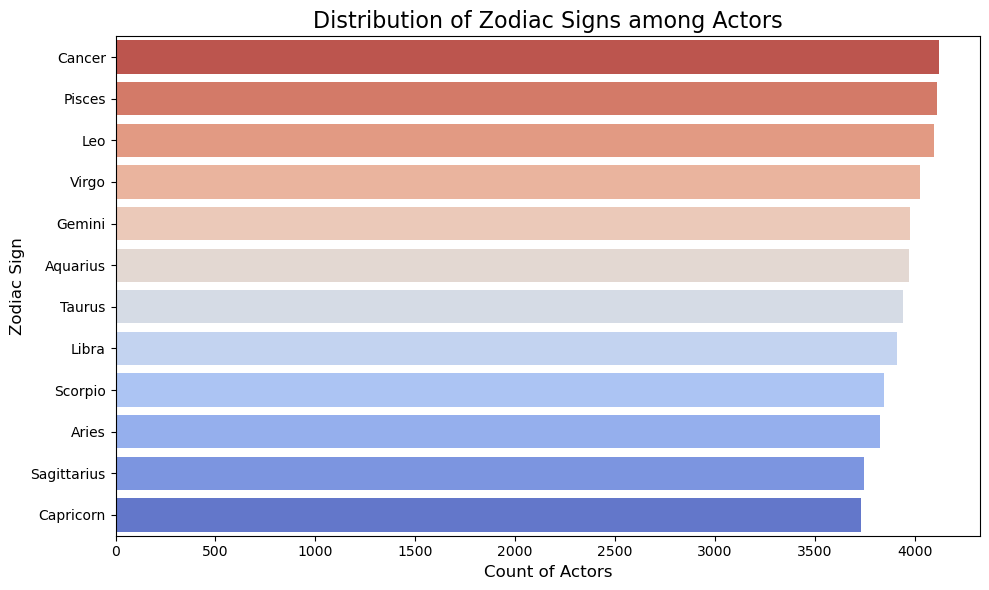

In [2]:
# Generate Zodiac distribution
CharacterMeta_cleaned['Zodiac Sign'] = CharacterMeta_cleaned['Actor date of birth'].apply(get_zodiac_sign)
Actordata=CharacterMeta_cleaned[['Actor gender','Freebase actor ID','Zodiac Sign']].drop_duplicates()
zodiac_counts = Actordata['Zodiac Sign'].value_counts().reset_index()
zodiac_counts.columns = ['Zodiac Sign', 'Count']
zodiac_counts = zodiac_counts.sort_values(by="Count", ascending=False)

illstrate_zodiac_distribution(zodiac_counts)

#### Plot Observations
The zodiac sign **Cancer** has the highest representation, with **4,174 actors**, while **Sagittarius** has the lowest representation, with **3,693 actors**. 

For further details, refer to the **`Zodiac_distribution.ipynb`** notebook in the `tests` directory.


In [3]:
import numpy as np
# Statistical analysis (Z-Scores and Chi-Square Test)
calculate_z_scores(zodiac_counts)

# Chi-square test
calculate_chi_square(zodiac_counts)

    Zodiac Sign  Proportion   Z-Score   P-Value  Significant?
0        Cancer    0.087111  2.972461  0.002954          True
1        Pisces    0.086921  2.822729  0.004762          True
2           Leo    0.086561  2.539902  0.011088          True
3         Virgo    0.085123  1.408592  0.158956         False
4        Gemini    0.084045  0.560109  0.575405         False
5      Aquarius    0.083961  0.493562  0.621616         False
6        Taurus    0.083369  0.027728  0.977879         False
7         Libra    0.082650 -0.537927  0.590628         False
8       Scorpio    0.081275 -1.619326  0.105377         False
9         Aries    0.080895 -1.918790  0.055011         False
10  Sagittarius    0.079161 -3.283017  0.001027          True
11    Capricorn    0.078928 -3.466023  0.000528          True
Chi-Square Statistic: 50.583051420838956
P-Value: 4.91580005945822e-07
Reject H0: The zodiac distribution is significantly different from uniform.


#### Z-Scores and Chi-square Observations
- Significant deviations: Signs like **Cancer**, **Pisces**, and **Sagittarius** show statistically significant differences (*p-value* < 0.05).  
- No significant difference: Signs like **Virgo**, **Gemini** have proportions that are not significantly different from the expected uniform distribution (*p-value* > 0.05). This means that these signs are more evenly represented relative to the expected proportion, whereas the others are either overrepresented or underrepresented significantly.

Among 12 zodiacs, 5 of them have significant differences from the average. It may be a coincidence, or maybe not. At the current stage, we dicided that we will raise a more specific conclusion later.


#### 2.2 Gender Analysis of Zodiac Sign Distribution
In this analysis, we group the actor in different genders and analyze the distribution of zodiac signs among actors of different genders. We drew the graph to present the zodiac sign distribution of actors of different genders and use Chi-Square Statistic to test if there is significant difference between the zodiac sign distributions of male and female actors. 

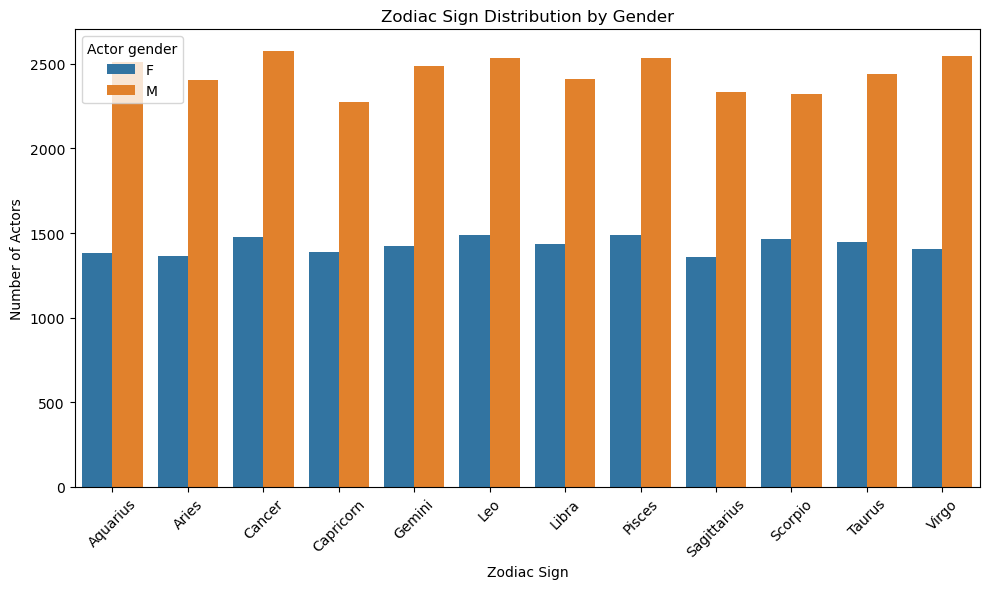

In [4]:
GenderDistributionAnalysis(Actordata)

##### Plot Observations
In this dataset, the number of actor is greater than the number of female actor. Among male actors, **Cancer** is the most common zodiac sign and **Caprisorn** is the least common zodiac sign. Among female actors, **Leo** is the most common zodiac sign and **Sagittarius** is the least common zodiac sign. Actors with the zodiac signs **Virgo**, **Pisces**, and **Cancer** are relatively numerous across both genders. Actors with the zodiac signs **Sagittarius** and **Aries**  are relatively few across both genders. 

In [5]:
gender_zodiac_chi2_heatmap(Actordata,'Zodiac Sign', 'Actor gender')

Chi-Squared Test Statistic: 15.100049628019297
P-Value: 0.1779622818036978
There is no significant difference between the zodiac sign distributions of male and female actors.


#### Chi-square Observations
When we analyse the zodiac sign distribution among the two genders, we found that there is no significant difference between the zodiac sign distributions of male and female actors. That is the gender has no significant influence in actors' zodiac signs distribution.

### 3. Preferences for movie genres among actors of different zodiac signs
#### 3.1 Genre Distribution Analysis
First, we load the data and explore the genre distribution of our dataset

In [6]:
# 1. Load data
movie_meta, character_meta = load_and_prepare_data(
    "data/RawDatasets/MovieSummaries/movie.metadata.tsv",
    "data/ProcessedDatasets/cleaned.character.metadata.tsv"
)
# 2. Explore the data
unique_genres = get_unique_genres(movie_meta)
# 3. Create genre mapping
genre_mapping, reverse_mapping = create_genre_mapping()
# 4. Analyze the original movie genre distribution
genre_counts = analyze_genre_distribution(movie_meta, reverse_mapping)


=== Basic Statistics ===
Total number of movies: 81740
Total number of characters/actors: 242096
Number of valid birth dates: 242096


In [7]:
# Load Data
print("Original Genre Distribution-----")
for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(movie_meta)) * 100
    print(f"{genre}: {count} movies ({percentage:.2f}%)")

Original Genre Distribution-----
Drama: 34007 movies (41.60%)
Comedy: 20711 movies (25.34%)
Action/Adventure: 18320 movies (22.41%)
Romance Film: 13606 movies (16.65%)
Thriller: 8743 movies (10.70%)
Crime Fiction: 6948 movies (8.50%)
Documentary: 5630 movies (6.89%)
Horror: 5279 movies (6.46%)
Family Film: 4598 movies (5.63%)
Musical: 4160 movies (5.09%)
Animation: 3534 movies (4.32%)


##### Analysis
Drama dominates the dataset (41.60%), followed by Comedy (25.34%) and Action/Adventure (22.41%). This distribution reflects typical Hollywood production patterns. The least represented genres are Animation (4.32%) and Musical (5.09%), which typically require higher production costs.

#### 3.2 Statistical Analysis
In this part, we use different statistical analysis method to analysis if actors of different zodiac signs tend to **prefer specific movie genres** and plot the result to make further analysis

In [8]:
# 5. Calculate zodiac signs
character_meta = calculate_zodiac_signs(character_meta)
# 6. Get zodiac-genre matrix
zodiac_genre_matrix, zodiac_counts = get_zodiac_genre_matrix(
    character_meta, movie_meta, genre_mapping, reverse_mapping
)
# 7. Calculating the base rates
base_rates = calculate_base_rates(movie_meta, reverse_mapping)
# 8. Calculate preference matrix
genres = list(set(reverse_mapping.values()))
zodiac_signs = list(zodiac_genre_matrix.keys())
preference_matrix = calculate_preference_matrix(zodiac_genre_matrix, zodiac_counts, genres)
# 9. Convert to DataFrame for analysis
pref_df = pd.DataFrame(preference_matrix).T
# 10. Calculate statistics
z_scores = pd.DataFrame(stats.zscore(pref_df.values, axis=0), 
                       columns=genres, 
                       index=zodiac_signs)
specificity_scores = calculate_specificity_scores(pref_df, base_rates)
# 11. Perform statistical tests
test_results = perform_statistical_tests(pref_df.values, genres, zodiac_signs)

/Users/renyi/miniforge3/envs/ada/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [9]:
print("Statistical Test Results-----")
print("Normality Test Results:")
for genre, results in test_results['normality'].items():
    print(f"{genre}:")
    print(f"Shapiro-Wilk: stat={results['Shapiro_stat']:.3f}, p={results['Shapiro_p']:.3f}")
    print(f"D'Agostino's K^2: stat={results['K2_stat']:.3f}, p={results['K2_p']:.3f}")

print("ANOVA Test Results:")
f_stat, anova_p = test_results['anova']
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {anova_p:.3f}")

print("Kruskal-Wallis Test Results:")
h_stat, kw_p = test_results['kruskal']
print(f"H-statistic: {h_stat:.3f}")
print(f"p-value: {kw_p:.3f}")

print("Multiple Comparison Results:")
for source, orig_p, corr_p, rej in test_results['multiple_comparison']:
    print(f"{source:20} Original p={orig_p:.3f}, Corrected p={corr_p:.3f}, Significant={rej}")

Statistical Test Results-----
Normality Test Results:
Romance Film:
Shapiro-Wilk: stat=0.919, p=0.281
D'Agostino's K^2: stat=2.156, p=0.340
Musical:
Shapiro-Wilk: stat=0.948, p=0.611
D'Agostino's K^2: stat=0.010, p=0.995
Drama:
Shapiro-Wilk: stat=0.950, p=0.634
D'Agostino's K^2: stat=1.776, p=0.412
Comedy:
Shapiro-Wilk: stat=0.854, p=0.041
D'Agostino's K^2: stat=4.769, p=0.092
Animation:
Shapiro-Wilk: stat=0.953, p=0.688
D'Agostino's K^2: stat=0.022, p=0.989
Crime Fiction:
Shapiro-Wilk: stat=0.893, p=0.128
D'Agostino's K^2: stat=1.719, p=0.423
Horror:
Shapiro-Wilk: stat=0.967, p=0.882
D'Agostino's K^2: stat=0.604, p=0.739
Documentary:
Shapiro-Wilk: stat=0.915, p=0.245
D'Agostino's K^2: stat=1.281, p=0.527
Action/Adventure:
Shapiro-Wilk: stat=0.957, p=0.745
D'Agostino's K^2: stat=0.977, p=0.614
Family Film:
Shapiro-Wilk: stat=0.962, p=0.810
D'Agostino's K^2: stat=0.301, p=0.860
Thriller:
Shapiro-Wilk: stat=0.898, p=0.151
D'Agostino's K^2: stat=4.263, p=0.119
ANOVA Test Results:
F-statis

##### Statistical Analysis Findings
1. **Normality Tests**: Most genres show normal distribution (p > 0.05) except Comedy (Shapiro-Wilk p=0.041), suggesting parametric tests are generally appropriate.

2. **ANOVA Results**: Highly significant differences found (F=8068.485, p<0.001), indicating strong genre preference variations across zodiac signs.

3. **Kruskal-Wallis**: Confirms ANOVA findings (H=129.097, p<0.001), supporting robust non-parametric validation.

4. **Multiple Comparisons**: After Bonferroni correction, ANOVA remains significant while individual genre tests show conservative results, controlling for family-wise error rate.

In [10]:
# 12. Original preference heat map
preference_heatmap = create_preference_heatmap(pref_df.values * 100, genres, zodiac_signs)
preference_heatmap.show()

![preference_heatmap](figures/preference_heatmap.png)

###### 1. **Raw Preferences**: 
- Drama consistently shows high preference (48-52%) across all signs
- Action/Adventure shows notable variation (35-39%)
- Documentary remains consistently low (1.1-1.4%)

In [11]:
# 13. Preference heatmap after baseline correction
normalized_pref_heatmap = create_normalized_preference_heatmap(pref_df.values, base_rates, genres, zodiac_signs)
normalized_pref_heatmap.show()

![normalized_pref_heatmap](figures/normalized_pref_heatmap.png)

##### 2. **Normalized Preferences**:
The normalization process accounts for the inherent bias in movie genre distribution using base rates:

1. **Base Rate Calculation**:
   - For each genre g: `base_rate(g) = total_movies_in_genre / total_movies`

2. **Preference Normalization**:
   - For each zodiac sign z and genre g:
   - Raw preference: `raw_pref(z,g) = movies_of_genre_by_zodiac / total_movies_by_zodiac`
   - Normalized preference: `norm_pref(z,g) = (raw_pref(z,g) - base_rate(g)) / base_rate(g)`

This normalization reveals true preferences by:
- Positive values: indicate above-baseline preference
- Negative values: indicate below-baseline preference
- Value magnitude: represents deviation from expected preference based on genre availability

For example, Aquarius's +0.74 in Action/Adventure means 74% higher preference than expected given the genre's base rate of 22.4%.

Findings:
- Aquarius shows strongest Action/Adventure affinity (+0.74)
- Documentary shows consistent negative preference across all signs
- Comedy shows moderate positive preference across all signs

In [12]:
# 14. Specificity heat map
specificity_heatmap = create_specificity_heatmap(specificity_scores, genres, zodiac_signs)
specificity_heatmap.show()

![specificity_heatmap](figures/specificity_heatmap.png)

##### 3. Specificity Analysis: Key Findings in Zodiac-Genre Preferences**:

Specificity measures how unique a zodiac sign's preference is compared to other signs, incorporating base rate adjustment:

1. **Base Rate Normalization**:
   - `normalized_pref(z,g) = (raw_pref(z,g) - base_rate(g)) / base_rate(g)`

2. **Specificity Calculation**:
   For each zodiac z and genre g:
   others_mean = mean(normalized_pref(other_signs,g))
   specificity(z,g) = normalized_pref(z,g) - others_mean

   This produces:
   - Positive values: preference stronger than other signs
   - Negative values: preference weaker than other signs
   - Magnitude: degree of preference uniqueness


###### Strong Positive Associations (Specificity > 0.15)
1. **Scorpio's Family/Animation Affinity**
   - Strongest positive association with Animation (0.175)
   - Similarly strong preference for Family Films (0.167)
   - Suggests Scorpio may be particularly drawn to imaginative, fantastical content

2. **Capricorn's Musical Connection**
   - Notable specificity for Musical films (0.170)
   - Interestingly contrasts with their strong aversion to Family Films

3. **Sagittarius's Thriller Preference**
   - Distinctive preference for Thrillers (0.125)
   - Also shows moderate interest in Crime Fiction (0.083)
   - Indicates potential attraction to suspenseful, complex narratives

###### Moderate Positive Associations (0.07-0.15)
- **Virgo**: Family Films (0.118)
- **Libra**: Musical (0.110)
- **Aquarius**: Action/Adventure (0.097)
- **Cancer**: Crime Fiction (0.086)

###### Notable Negative Associations (< -0.10)
1. **Strong Aversions**
   - Gemini: Family Films (-0.155)
   - Capricorn: Family Films (-0.154)
   - Sagittarius: Animation (-0.147)
   - Taurus: Musical (-0.149)

2. **Documentary Trend**
   - Consistently negative or near-zero specificity across all signs
   - Aries shows strongest aversion (-0.132)
   - Suggests documentary preference might be less influenced by zodiac

###### Balanced/Neutral Genres
- **Drama**: Relatively small specificity values across signs
- **Comedy**: Limited variation, suggesting universal appeal
- **Romance Film**: Moderate variations but no strong specificity

###### Pattern Analysis
1. **Genre Clustering**
   - Family Films and Animation often show correlated preferences
   - Crime Fiction and Thriller preferences tend to align
   - Musical preferences show distinct patterns from other genres

2. **Sign Characteristics**
   - Fire signs (Aries, Leo, Sagittarius) show varied preferences across genres
   - Earth signs (Taurus, Virgo, Capricorn) display strong contrasts
   - Air signs (Gemini, Libra, Aquarius) show moderate specificity patterns
   - Water signs (Cancer, Scorpio, Pisces) tend toward creative/emotional genres

###### Statistical Significance
- While these patterns are notable, effect sizes remain moderate
- Maximum specificity values around ±0.17 suggest subtle rather than deterministic relationships

In [13]:
# 15. Coefficient of variation plot
variability_plot = create_variability_plot(
    pref_df.std(axis=1) / pref_df.mean(axis=1),
    zodiac_signs
)
variability_plot.show()

![variability_plot](figures/variability_plot.png)

##### 4. Variability Analysis: Coefficient of Variation Results

This visualization represents the coefficient of variation (CV) across genre preferences for each zodiac sign, revealing insights about preference consistency:

Key Observations:
1. **Magnitude Range**:
   - CVs cluster tightly around 0.82-0.85
   - Minimal variation between signs (less than 0.05 difference)

2. **Ranking Analysis**:
   - Highest Variability: Taurus, Gemini, and Aries (~0.85)
   - Lowest Variability: Scorpio (~0.82)
   
3. **Interpretation**:
   - All signs show relatively high CVs (>0.82), indicating substantial variation in genre preferences across all zodiac signs
   - The small CV differences between signs (≈0.03) suggest that while individual signs may have different genre preferences, their tendency to vary across genres is remarkably consistent
   - Taurus, Gemini, and Aries showing highest variability suggests these signs may be more eclectic in their movie choices
   - Scorpio showing lowest variability hints at more focused or consistent genre preferences, though the difference is subtle

4. **Statistical Significance**:
   - Given the small differences in CV values, these variations might not be statistically significant
   - The consistency of high CV values across all signs suggests a universal pattern in how humans vary their movie genre preferences, regardless of zodiac sign

This analysis suggests that while individual genre preferences may differ by zodiac sign, the degree of preference variation is a relatively stable human characteristic that transcends astrological associations, with only subtle differences between signs.

In [14]:
# 16. Output significant findings
significant_prefs = find_significant_preferences(z_scores, specificity_scores, 
                                               zodiac_signs, genres)
if not significant_prefs.empty:
    print("\n=== Most Significant Genre Preferences ===")
    print(significant_prefs.to_string(index=False))


=== Most Significant Genre Preferences ===
     Zodiac            Genre  Z-score  Specificity
Sagittarius         Thriller    2.369        0.125
   Aquarius Action/Adventure    1.972        0.097
     Taurus            Drama    2.242        0.048


#### Significant Findings
Three statistically significant preferences emerged:
- Sagittarius → Thriller (Z=2.369)
- Aquarius → Action/Adventure (Z=1.972)
- Taurus → Drama (Z=2.242)

While statistically significant, effect sizes remain modest, suggesting zodiac influence on genre preference is subtle rather than deterministic.

### 4. Movies with different genres' preference for actors' zodiac signs


#### 4.1 Understanding the data
In this par, we will be looking at the data that we have. We will plot some graph to have a better understanding of the data we are working with. We did not show everything because it would be a lot and sometimes, not really useful in our context.

We first decided to have a look at the number of movie released each year.

In [15]:
CharacterMeta = getCharacterMeta("data/RawDatasets/MovieSummaries/character.metadata.tsv")
MovieMeta = getMovieMeta("data/RawDatasets/MovieSummaries/movie.metadata.tsv")
CharacterMetaCleaned = getCharacterMetaCleaned("data/ProcessedDatasets/cleaned.character.metadata.tsv")
    

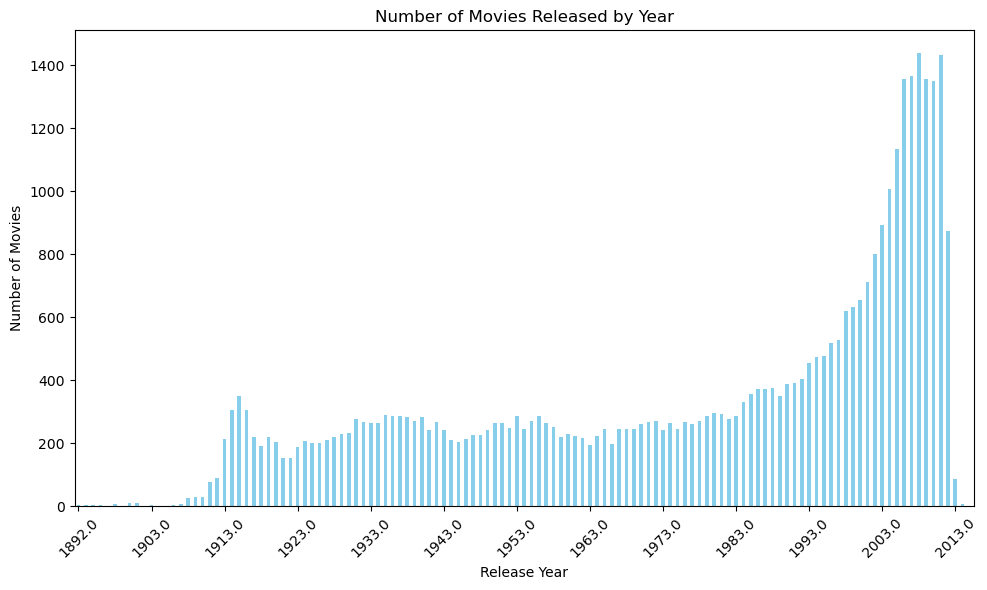

In [16]:
MovieMeta = plot_movies_by_year(MovieMeta)

We then wanted to have a better representation of those movies. To do this, we looked at the most common movie genres and their repartition over decade. We only show the 4 most popular genres to ease the reading.


=== Most Common Movie Genres ===
Drama: 34007
Comedy: 16349
Romance Film: 10234
Black-and-white: 9094
Action: 8797
Thriller: 8743
Short Film: 8141
World cinema: 7155
Crime Fiction: 6948
Indie: 6897
Top 4 Most Popular Movie Genres by Decade:

1890.0s:
  Genre: Silent film - Count: 24
  Genre: Short Film - Count: 23
  Genre: Indie - Count: 19
  Genre: Black-and-white - Count: 15

1900.0s:
  Genre: Silent film - Count: 87
  Genre: Short Film - Count: 78
  Genre: Black-and-white - Count: 57
  Genre: Indie - Count: 49

1910.0s:
  Genre: Silent film - Count: 1850
  Genre: Black-and-white - Count: 1516
  Genre: Short Film - Count: 1281
  Genre: Indie - Count: 1129

1920.0s:
  Genre: Silent film - Count: 1578
  Genre: Black-and-white - Count: 1052
  Genre: Drama - Count: 714
  Genre: Indie - Count: 605

1930.0s:
  Genre: Black-and-white - Count: 1235
  Genre: Drama - Count: 1022
  Genre: Comedy - Count: 749
  Genre: Short Film - Count: 556

1940.0s:
  Genre: Drama - Count: 930
  Genre: Black-

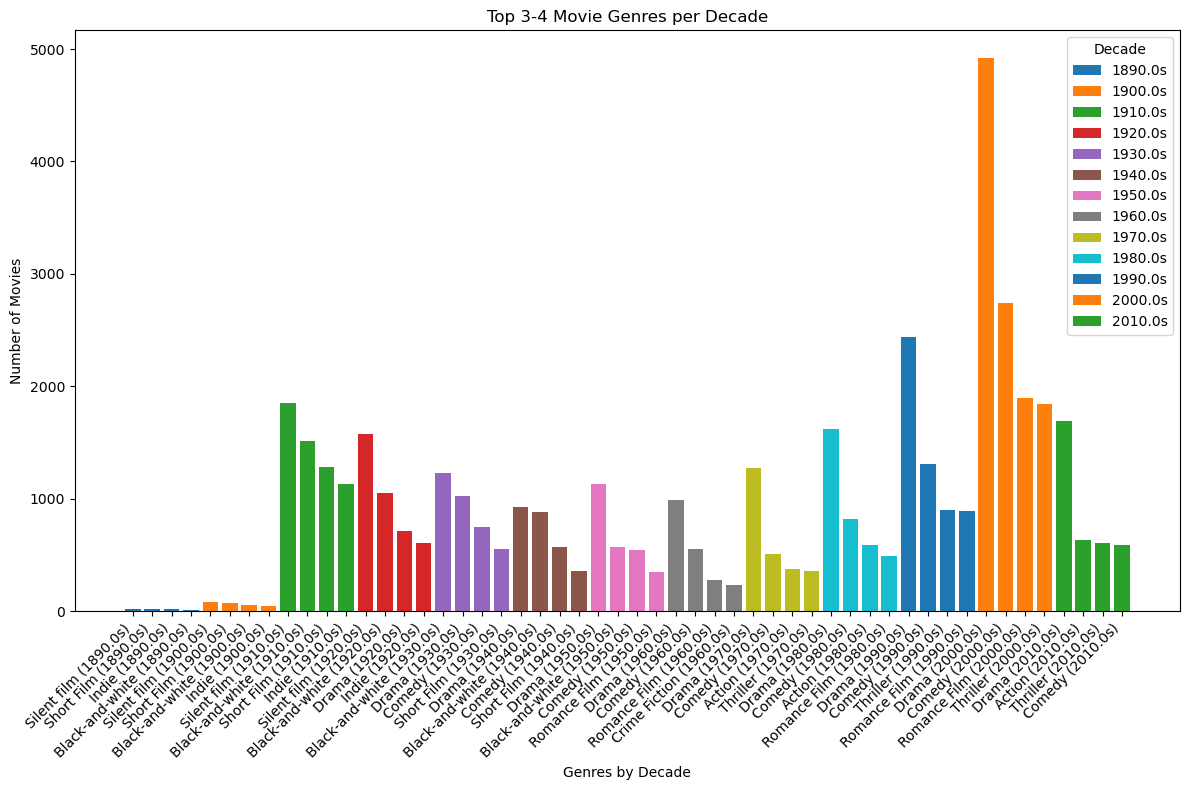

In [17]:
# Initialize a set to store all unique genres
all_genres = set()

# Create a dictionary to store the count of each genre
genre_counts = {}

# Iterate through each row in the 'Movie genres' column
for genres_dict_str in MovieMeta['Movie genres'].dropna():
    # Use eval to convert the string to a dictionary (assuming correct format)
    genres_dict = eval(genres_dict_str)
        
    # Extract only the genre names (values of the dictionary)
    genres = genres_dict.values()
        
    # Update the set of all unique genres
    all_genres.update(genres)
        
    # Count each genre's occurrences
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1


MovieMeta, sorted_genres, genre_counts_by_decade, top_genres_by_decade = plot_top_genres_by_decade(genre_counts, MovieMeta)

#### 4.2 Actors Zodiac Sign in Film Genres
In this part, we will begin the anylsis of our data, but this part consists only of the first step in the analysis. Our goal is not to find everything right now, but to see that there is something and the we can continue that way in the future

Based on the number of actors in each zodiac sign, we can find which proportion of those actors are playing in which type of the movie genres. We will only plot the 3 highest proportions and the 3 lowest ones because it allows us to read the data more easily, and also because this is enough to see if there is an outlier.

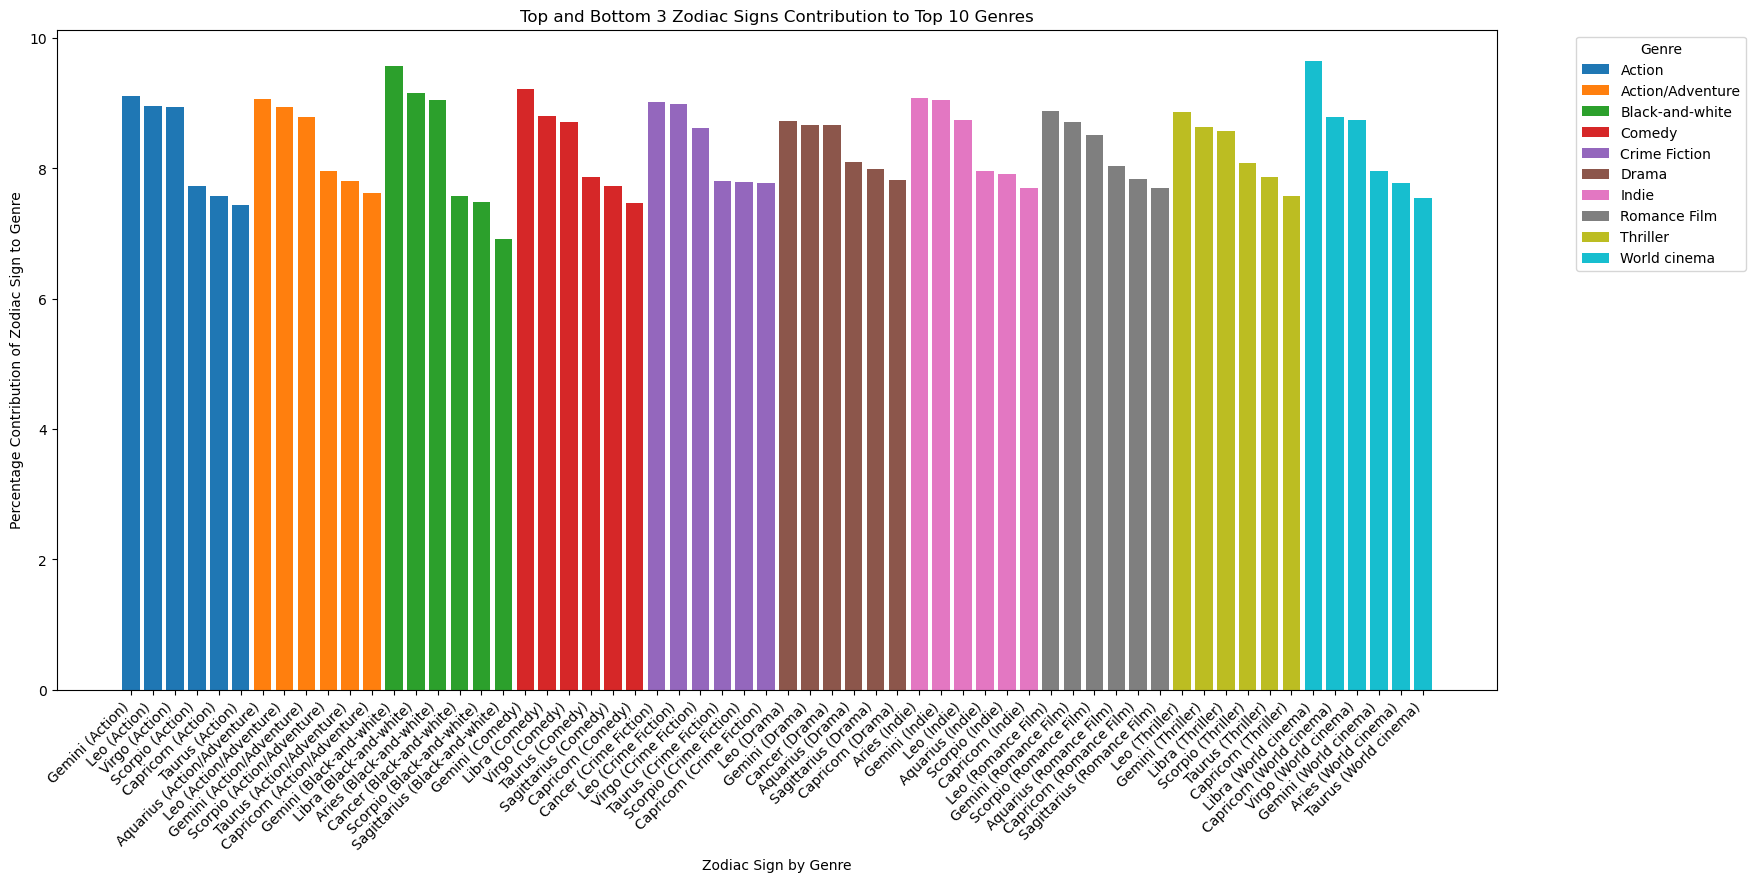

Top and Bottom 3 Zodiac Signs Contribution to Each of the Top 10 Genres:

Genre: Action
  Zodiac Sign: Gemini - Contribution: 9.11%
  Zodiac Sign: Leo - Contribution: 8.95%
  Zodiac Sign: Virgo - Contribution: 8.94%
  Zodiac Sign: Scorpio - Contribution: 7.74%
  Zodiac Sign: Capricorn - Contribution: 7.57%
  Zodiac Sign: Taurus - Contribution: 7.44%

Genre: Action/Adventure
  Zodiac Sign: Aquarius - Contribution: 9.06%
  Zodiac Sign: Leo - Contribution: 8.95%
  Zodiac Sign: Gemini - Contribution: 8.79%
  Zodiac Sign: Scorpio - Contribution: 7.95%
  Zodiac Sign: Taurus - Contribution: 7.80%
  Zodiac Sign: Capricorn - Contribution: 7.63%

Genre: Black-and-white
  Zodiac Sign: Gemini - Contribution: 9.57%
  Zodiac Sign: Libra - Contribution: 9.16%
  Zodiac Sign: Aries - Contribution: 9.05%
  Zodiac Sign: Cancer - Contribution: 7.58%
  Zodiac Sign: Scorpio - Contribution: 7.48%
  Zodiac Sign: Sagittarius - Contribution: 6.92%

Genre: Comedy
  Zodiac Sign: Gemini - Contribution: 9.21%
  Zod

In [18]:
merged_data = plot_zodiac_contribution_to_genres(CharacterMetaCleaned, MovieMeta, genre_counts)

In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967690 entries, 0 to 967689
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Wikipedia movie ID               967690 non-null  int64         
 1   Freebase movie ID_x              967690 non-null  object        
 2   Movie release date_x             955509 non-null  object        
 3   Character name                   459279 non-null  object        
 4   Actor date of birth              967690 non-null  object        
 5   Actor gender                     962722 non-null  object        
 6   Actor height                     489659 non-null  float64       
 7   Actor ethnicity                  307299 non-null  object        
 8   Actor name                       967648 non-null  object        
 9   Actor age at movie release       847470 non-null  float64       
 10  Freebase character/actor map ID  967690 non-

In [23]:
merged_data.head()

,Wikipedia movie ID,Freebase movie ID_x,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,...,Movie name,Movie release date_y,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Release Year,Cleaned Movie genres,Release Decade
0,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,...,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,Mystery,2000.0
1,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,...,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,Biographical film,2000.0
2,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,...,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,Drama,2000.0
3,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,...,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,Crime Drama,2000.0
4,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,...,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,Mystery,2000.0


In [31]:
zodiac_genre_df = merged_data[['Zodiac Sign', 'Cleaned Movie genres']].dropna()
zodiac_genre_df.head()

,Zodiac Sign,Cleaned Movie genres
0,Sagittarius,Mystery
1,Sagittarius,Biographical film
2,Sagittarius,Drama
3,Sagittarius,Crime Drama
4,Capricorn,Mystery


In [32]:
zodiac_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965540 entries, 0 to 967689
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Zodiac Sign           965540 non-null  object
 1   Cleaned Movie genres  965540 non-null  object
dtypes: object(2)
memory usage: 22.1+ MB


In [103]:
overall_zodiac_distribution = zodiac_genre_df['Zodiac Sign'].value_counts().sort_index()
overall_zodiac_distribution

Zodiac Sign
Aquarius       80131
Aries          81596
Cancer         82128
Capricorn      74011
Gemini         85994
Leo            84755
Libra          83247
Pisces         79976
Sagittarius    76220
Scorpio        78519
Taurus         77232
Virgo          81731
Name: count, dtype: int64

In [123]:
# Chi-squared test of homogeneity

def chi_squared_test_genre_zodiac(overall_zodiac_distribution, genre_now):
    specific_zodiac_disctribution = zodiac_genre_df[zodiac_genre_df['Cleaned Movie genres'] == genre_now]['Zodiac Sign'].value_counts().sort_index()

    chi_squared_contigency_df = pd.DataFrame({
        'Total': overall_zodiac_distribution,
        genre_now: specific_zodiac_disctribution
    }).T
    print(f"Chi-Squared Contingency Table for {genre_now}:")
    print(chi_squared_contigency_df)
    chi2, p, dof, expected = chi2_contingency(chi_squared_contigency_df)
    confidence_level = 0.95

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"P-value: {p:.3f}, Degrees of Freedom: {dof}")
    print(f"{genre_now} and Zodiac Sign are {'DEPENDENT' if p < 1 - confidence_level else 'independent'} at {confidence_level * 100}% confidence level")
    print("Expected values:")
    print(pd.DataFrame(expected.round(2), columns=overall_zodiac_distribution.index, index=[f'Total', f'{genre_now}']))
    observed = np.array([overall_zodiac_distribution.tolist(), specific_zodiac_disctribution.tolist()])
    chi_square_statistic = ((observed - expected) ** 2 / expected).round(2)
    chi_square_statistic = pd.DataFrame(chi_square_statistic, columns=overall_zodiac_distribution.index, index=[f'Total', f'{genre_now}'])

    print("Chi-square statistic contribution:")
    print(chi_square_statistic)

    # Get the top 3 chi-square statistics
    top_chi_square_stats = chi_square_statistic.unstack().sort_values(ascending=False).head(3)
    print("Top 3 Chi-Square Statistics: ")
    print(top_chi_square_stats)

In [124]:
chi_squared_test_genre_zodiac(overall_zodiac_distribution, 'Action')

Chi-Squared Contingency Table for Action:
Zodiac Sign  Aquarius  Aries  Cancer  Capricorn  Gemini    Leo  Libra  Pisces  \
Total           80131  81596   82128      74011   85994  84755  83247   79976   
Action           3411   3270    3479       3002    3610   3549   3389    3189   

Zodiac Sign  Sagittarius  Scorpio  Taurus  Virgo  
Total              76220    78519   77232  81731  
Action              3183     3067    2950   3544  
Chi-squared statistic: 48.864
P-value: 0.000, Degrees of Freedom: 11
Action and Zodiac Sign are DEPENDENT at 95.0% confidence level
Expected values:
Zodiac Sign  Aquarius    Aries    Cancer  Capricorn    Gemini       Leo  \
Total        80247.22  81519.0  82230.78   73975.72  86070.14  84821.41   
Action        3294.78   3347.0   3376.22    3037.28   3533.86   3482.59   

Zodiac Sign    Libra    Pisces  Sagittarius   Scorpio    Taurus     Virgo  
Total        83219.2  79885.09     76271.46  78368.36  77019.73  81911.87  
Action        3416.8   3279.91    

In [125]:
zodiac_genre_df['Cleaned Movie genres'].value_counts().sort_values(ascending=False).head(20)

Cleaned Movie genres
Drama               120790
Comedy               72361
Romance Film         44174
Thriller             41519
Action               39643
Crime Fiction        29548
Action/Adventure     26722
World cinema         26517
Black-and-white      23732
Indie                23686
Adventure            23273
Family Film          18930
Horror               17918
Romantic drama       16682
Musical              15912
Romantic comedy      15515
Mystery              14864
Fantasy              14364
Science Fiction      13821
Crime Thriller       12051
Name: count, dtype: int64

In [126]:
for genre in zodiac_genre_df['Cleaned Movie genres'].value_counts().sort_values(ascending=False).head(20).index:
    print(f"\n\n{genre} Genre:")
    chi_squared_test_genre_zodiac(overall_zodiac_distribution, genre)



Drama Genre:
Chi-Squared Contingency Table for Drama:
Zodiac Sign  Aquarius  Aries  Cancer  Capricorn  Gemini    Leo  Libra  Pisces  \
Total           80131  81596   82128      74011   85994  84755  83247   79976   
Drama            9777  10130   10464       9451   10475  10545  10404    9962   

Zodiac Sign  Sagittarius  Scorpio  Taurus  Virgo  
Total              76220    78519   77232  81731  
Drama               9654     9854    9777  10297  
Chi-squared statistic: 22.779
P-value: 0.019, Degrees of Freedom: 11
Drama and Zodiac Sign are DEPENDENT at 95.0% confidence level
Expected values:
Zodiac Sign  Aquarius    Aries    Cancer  Capricorn    Gemini       Leo  \
Total        79911.05  81526.9  82296.61   74181.79  85742.53  84703.51   
Drama         9996.95  10199.1  10295.39    9280.21  10726.47  10596.49   

Zodiac Sign     Libra    Pisces  Sagittarius   Scorpio    Taurus     Virgo  
Total        83237.86  79937.71     76325.59  78546.73  77334.39  81795.32  
Drama        10413.

##### Analysis:
Here we decided to take the 10 genres with the most films, and to look at how many actors of each zodic sign were playing in those genres. We only plotted the 3 highest representatives and the 3 lowest one among the zodiac signs. What we obtained is that there seems to be some preferences, but there could be a bias based on the number of actors in each of the categories. We then decided to normalized our data to see if there is a difference

The previous results could have a bias because of the difference in number of actors in a specific zodiac sign. So we decided to normalized our data based on the weighted average of each zodiac sign.

In [19]:
TestFunction.plot_zodiac_weighted_contribution_to_genres(genre_counts_by_zodiac, zodiac_counts)

NameError: name 'TestFunction' is not defined

Analysis:
After normalizing the data and weighting each zodiac sign, we can see that the preferences of the actors are more difficult to see. There are still some cases like the Black And White or World Cinema, where some zodiac sign can reach up to 9.6%! The mean value in case of no preferences at all would be 8.3%, the difference may not seems important, but as we have a lot of data, it's enough to consider doing statistical analysis.